In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
#Sample data, training

X = np.array(([39,13.58],[33,13.33],[82,13.47],[39,13.58],[41,13.67],[8,13.71],[58,13.76],[11,13.84],[37,13.92],[14,14.04]), dtype=float)
y= np.array(([54],[75],[55],[54],[59],[25],[34],[51],[40],[56]), dtype=float)

X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [3]:
class Neural_Network(object):
    def __init__(self):
        #Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (Parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
        print (self.W1, self.W2)
        
    def forward(self, X):
        #Propagate inputs through network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply sigmoid activation function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime (self, X, y):
        #compute derivative with respect to W1 and W2
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        
        return dJdW1, dJdW2
    
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        
        
    def computeNumericalGradient(self, X, y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(X, y)
            
            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        self.setParams(paramsInitial)

        return numgrad

In [4]:
#Structures are fixed thus hyperparameter
#Weights change, part of learning

#Data is moved through a method called forward
##Rather than passing inputs one at a time, matrices can be used to pass inputs.
##faster approach

#matrices be named :: X * W(1) = Z(2)
##Z(2)=activity of second layer.

In [5]:
class trainer(object):
    def __init__(self, N):
        #Making local reference to Neural Network:
        self.N = N
        
    def callbackF(self, params):
        #to see cost function value as being trained
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
 
        
    def costFunctionWrapper(self, params, X, y):
        #Wrapper function to setup obj fn
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X, y)
        return cost, grad
           
        
    def train(self, X, y):
        #make internal variables for callback function:
        self.X = X
        self.y = y
        
        #Make empty list to store costs:
        self.J =[]
        
        params0 = self.N.getParams()
        
        options = {'maxiter' : 500, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper,
                                 params0, jac = True, 
                                 method='BFGS', 
                                 args = (X,y), 
                                 options=options, 
                                 callback=self.callbackF)
        
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [6]:
NN = Neural_Network()

[[-0.18995857  2.732058    0.87688044]
 [ 0.86072962  0.53926542 -0.31196027]] [[ 1.25915796]
 [-1.5112805 ]
 [ 0.62090657]]


In [7]:
yHat = NN.forward(X)

In [8]:
yHat

array([[ 0.47019597],
       [ 0.4780334 ],
       [ 0.4417924 ],
       [ 0.47019597],
       [ 0.46791911],
       [ 0.52765633],
       [ 0.45273196],
       [ 0.52053089],
       [ 0.47328458],
       [ 0.51378656]])

In [9]:
y

array([[ 0.54],
       [ 0.75],
       [ 0.55],
       [ 0.54],
       [ 0.59],
       [ 0.25],
       [ 0.34],
       [ 0.51],
       [ 0.4 ],
       [ 0.56]])

In [10]:
cost1 = NN.costFunction(X,y)

In [11]:
dJdW1 , dJdW2 = NN.costFunctionPrime(X, y)

In [12]:
dJdW1

array([[-0.01473603,  0.00735925, -0.00790324],
       [-0.0142063 ,  0.00039292, -0.00749543]])

In [13]:
dJdW2

array([[-0.03449748],
       [-0.05620129],
       [-0.03421116]])

In [14]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X, y)

In [15]:
print (cost1, cost2)

[ 0.10387121] [ 0.14617014]


In [16]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [17]:
print (cost2, cost3)

[ 0.14617014] [ 0.23136524]


In [18]:
numgrad = NN.computeNumericalGradient(X, y)
numgrad

array([ 0.04742   , -0.01749373,  0.03050194,  0.11555466, -0.06016011,
        0.07634481,  0.25887179,  0.28774626,  0.19128578])

In [19]:
grad = NN.computeGradients(X,y)
grad

array([ 0.04742   , -0.01749373,  0.03050194,  0.11555466, -0.06016011,
        0.07634481,  0.25887179,  0.28774626,  0.19128578])

In [29]:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)


7.6737549207156648e-10

In [21]:
T = trainer(NN)

In [22]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.016750
         Iterations: 216
         Function evaluations: 247
         Gradient evaluations: 247


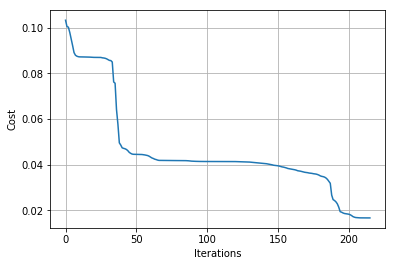

In [23]:
plt.plot(T.J)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

In [24]:
NN.costFunctionPrime(X,y)

(array([[ -2.93810032e-06,   0.00000000e+00,  -4.78688671e-07],
        [ -2.09686578e-06,   0.00000000e+00,  -3.62518388e-06]]),
 array([[  5.42282699e-06],
        [  5.42402552e-06],
        [  5.42409489e-06]]))

In [25]:
yhat=NN.forward(X)
np.round(yhat, 2)

array([[ 0.59],
       [ 0.73],
       [ 0.47],
       [ 0.59],
       [ 0.54],
       [ 0.25],
       [ 0.43],
       [ 0.53],
       [ 0.44],
       [ 0.47]])

In [26]:
y

array([[ 0.54],
       [ 0.75],
       [ 0.55],
       [ 0.54],
       [ 0.59],
       [ 0.25],
       [ 0.34],
       [ 0.51],
       [ 0.4 ],
       [ 0.56]])

In [27]:
np.matrix.transpose(y) * 100

array([[ 54.,  75.,  55.,  54.,  59.,  25.,  34.,  51.,  40.,  56.]])

In [28]:
nyhat = np.matrix.transpose(yhat)*100
np.round(nyhat, 2)

array([[ 58.57,  73.24,  47.16,  58.57,  53.5 ,  24.87,  43.48,  52.89,
         44.09,  46.6 ]])